## Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Loading Model

In [ ]:
model  = tf.keras.models.load_model('trained_model.keras')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Visualizaing Single Image of Test set

In [27]:
!pip install opencv-python

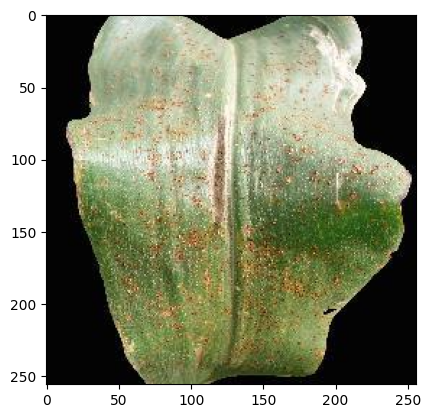

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = r"Plant_disease_dataset/test/test/AppleCedarRust3.JPG"  # raw string
# OR
# image_path = "C:/Users/SHRUTI BORDE/Desktop/mm/Plant_Disease_Prediction/test/test/PotatoEarlyBlight2.JPG"

img = cv2.imread(image_path)
if img is None:
    print("Error: Image not found at", image_path)
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()


## Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [ ]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 469ms/step


(array([[1.4839236e-26, 2.1791054e-32, 6.8892877e-34, 5.1516173e-34,
         0.0000000e+00, 4.2939771e-32, 6.8672701e-35, 3.8253215e-26,
         1.0000000e+00, 3.2216990e-33, 2.8970387e-32, 0.0000000e+00,
         1.9783027e-38, 2.7000819e-38, 3.2675121e-37, 3.5132389e-30,
         1.4615288e-36, 0.0000000e+00, 2.6233886e-36, 1.2978873e-31,
         1.6951440e-29, 0.0000000e+00, 5.5480557e-30, 0.0000000e+00,
         1.5607878e-37, 3.6763055e-34, 2.8218750e-33, 0.0000000e+00,
         0.0000000e+00, 3.2667708e-33, 3.8063177e-30, 0.0000000e+00,
         3.0000883e-35, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 7.0706736e-37]], dtype=float32),
 (1, 38))

In [ ]:
result_index = np.argmax(prediction)
result_index

8

In [ ]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

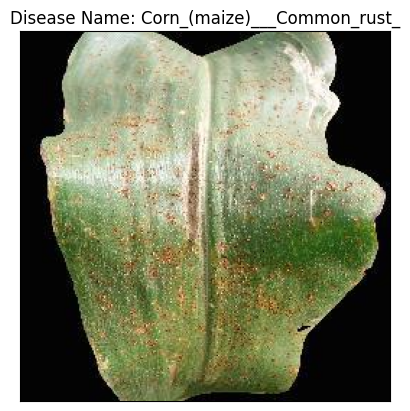

In [ ]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
model_prediction

'Corn_(maize)___Common_rust_'

In [ ]:
import os

os.makedirs("models", exist_ok=True)  # create folder if it doesn't exist
model.save("models/plant_disease_model.h5")
